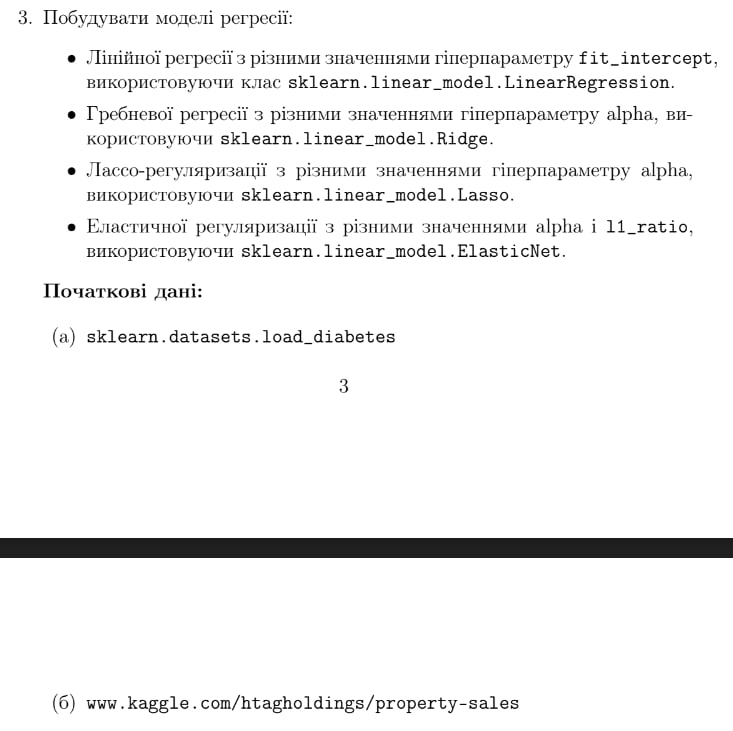 

In [212]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

X, y = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

In [213]:
def regression_score(y, predict):
    print("RMSE:", metrics.mean_squared_error(y, predict, squared=False))
    print("MSE:", metrics.mean_squared_error(y, predict, squared=True))
    print("R2:", metrics.r2_score(y, predict))
    print("MAPE:", metrics.mean_absolute_error(y, predict))

In [214]:
def gridsearchscore(regression):
    print(f'Best score: {regression.best_score_}, Best alpha: {regression.best_params_}')

In [215]:
def truepredplot(y_true, predicted):
    ax = sns.regplot(y=y_true, x=predicted)
    ax.set(xlabel='predicted values', ylabel='true values', xlim=(20, 350), ylim=(20, 350))
    plt.show()

In [216]:
print(sklearn.datasets.load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [217]:
X.rename(columns={'s1': 'tc', 's2': 'ldl', 's3': 'hdl', 's4': 'tch', 's5':'ltg', 's6': 'glu'}, inplace=True)

In [218]:
df = pd.merge(X, y, right_index=True, left_index=True)

In [219]:
df.describe().applymap("{0:.5f}".format)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,152.13348
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,77.09300
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777,25.00000
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318,87.00000
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108,140.50000
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792,211.50000
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561,346.00000


З цього видно, що дані у нас центровані, тобто їх матсподівання дорівнює нулю

Подивимось на кореляції ознак

In [220]:
corr = df.corr()
corr

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
tc,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
ltg,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
glu,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


<AxesSubplot:>

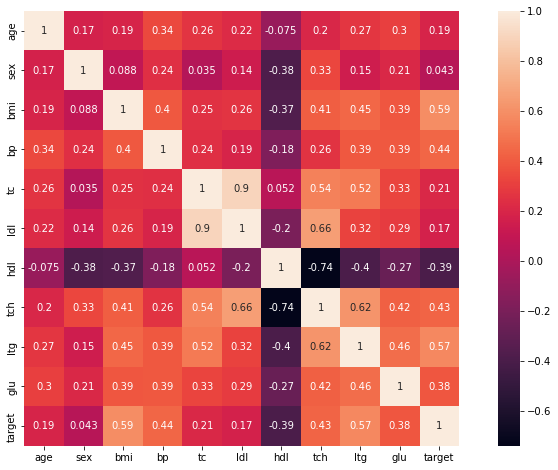

In [221]:
plt.figure(figsize = (14, 8))

sns.heatmap(corr, square=True, annot=True)

Бачимо, що ldl та tc, tch та hdl мають високу кореляцію між собою, тому ми не будемо використовувати їх вдвох як ознаки для лінійної регресії через загрозу мультиколлінеарності

Подивимось на розподіл цільової ознаки

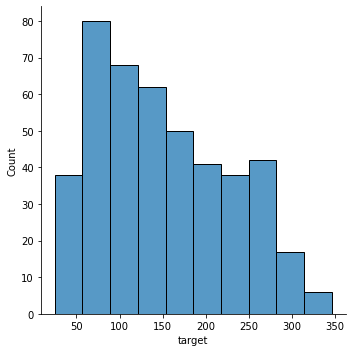

In [222]:
sns.displot(df['target'])

Усі інші ознаки не має сенсу представляти графічно оскільки вони були центровані <br>


<font size="5">Створимо модель (лінійна регресія):</font>


In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(['target', 'ldl', 'tch'], axis='columns')

In [224]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [225]:
X.head()

,age,sex,bmi,bp,tc,hdl,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.032356,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.031991,-0.046641


In [226]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.2,
                     random_state=17)

<font size="4">Спочатку для моделі зі значенням гіперпараметру fit_intercept = True</font>

In [227]:
linreg_fit_true = LinearRegression(fit_intercept=True)
linreg_fit_true.fit(X_train, y_train)

LinearRegression()

In [228]:
predict_true = linreg_fit_true.predict(X_test)

print("Test data")
regression_score(y_test, predict_true)

Test data
RMSE: 56.77996957305591
MSE: 3223.9649447171546
R2: 0.4540487166875442
MAPE: 45.91884547406024


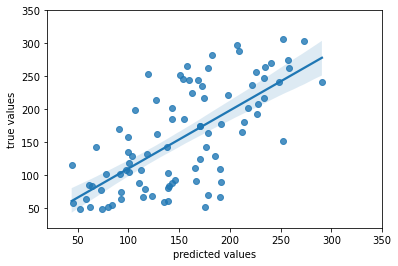

In [229]:
truepredplot(y_test, predict_true)

In [230]:
predict_true = linreg_fit_true.predict(X_train)

print("Train data")
regression_score(y_train, predict_true)

Train data
RMSE: 53.03722939713254
MSE: 2812.94770212406
R2: 0.5255340090383331
MAPE: 42.71644251362042


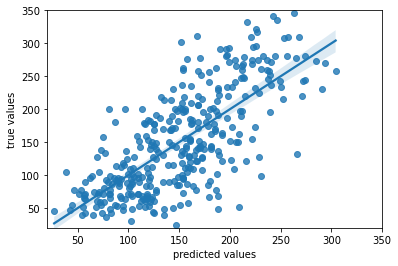

In [231]:
truepredplot(y_train, predict_true)

Порівнючи R2 ми бачимо, що модель показує себе майже однаково як на тестових данних, так і на навчальних данних <br>
Тому модель не є перенавченою

Дізнаємося які саме ознаки мають найбільшу вагу 

In [232]:
pd.DataFrame(linreg_fit_true.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
ltg,586.264831
bmi,495.533280
bp,310.890985
glu,73.032854
age,0.218921
tc,-126.785386
hdl,-262.764486
sex,-308.470868


З цього ми розуміємо, що логарифм рівня тригліцеридів у сироватці крові (ltg) має найбільшу вагу щодо прогресування захворювання, з іншого боку ліпопротеїди високої щільності (hdl) дає протидію прогрессуванню захворюванню, цікаво, що на це також сильно впливає стать (sex), а ось вік (age) людини порівнянно має найменшу вагу щодо прогресування

<font size="4">Зі значенням гіперпараметру fit_intercept = False</font>

In [233]:
linreg_fit_false = LinearRegression(fit_intercept=False)
linreg_fit_false.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [234]:
predict_false = linreg_fit_false.predict(X_test)

print("Test data")
regression_score(y_test, predict_false)

Test data
RMSE: 168.06897506709544
MSE: 28247.180380103946
R2: -3.783421855670686
MAPE: 157.8228720855836


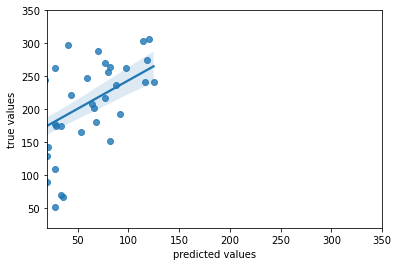

In [235]:
truepredplot(y_test, predict_false)

In [236]:
predict_false = linreg_fit_false.predict(X_train)

print("Train data")
regression_score(y_train, predict_false)

Train data
RMSE: 160.083666546345
MSE: 25626.780294921376
R2: -3.322524623762286
MAPE: 150.7928646521636


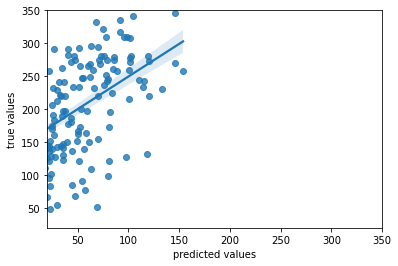

In [237]:
truepredplot(y_train, predict_false)

In [238]:
pd.DataFrame(linreg_fit_false.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
bmi,652.572694
ltg,466.746577
bp,165.215731
glu,58.427629
age,-9.800636
tc,-77.592330
hdl,-314.857087
sex,-383.165578


1. Модель показує себе жахливо як на тестових даних, так і на навчальних
2. Вона не є перенавченою
3. RMSE більше за математичне сподівання шуканої ознаки
4. R^2 загалом негативне, це означає, побудована лінія підходить гірше, ніж горизонтальна лінія
5. Це може бути зв'язано з тим, що дані хоч і центровані, але не масшатабовані і не вистачає вільного доданку до рівняння
6. Для fit_intercept=True найбільший коефіцієнт має ltf, а для fit_intercept=False - bmi

<font size="4">За отриманими результатами кращим вибором буде лінійна регрессія з fit_intercept=True</font>

<font size="5">Тепер спробуємо Rigde regression з різними параметрами alpha:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
parameters = {'alpha': [0.1, 1, 2, 5]}

rigde_reg_gridsearch = GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error', cv=5)

In [240]:
rigde_reg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error')

In [241]:
gridsearchscore(rigde_reg_gridsearch)

Best score: -3001.1300257097073, Best alpha: {'alpha': 0.1}


In [242]:
rigde_reg_gridsearch.cv_results_

{'mean_fit_time': array([0.00160055, 0.00160041, 0.0032002 , 0.00319986]),
 'std_fit_time': array([0.0032011 , 0.00320082, 0.00391943, 0.00391902]),
 'mean_score_time': array([0.00159988, 0.        , 0.        , 0.        ]),
 'std_score_time': array([0.00319977, 0.        , 0.        , 0.        ]),
 'param_alpha': masked_array(data=[0.1, 1, 2, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1}, {'alpha': 1}, {'alpha': 2}, {'alpha': 5}],
 'split0_test_score': array([-2642.31568044, -3080.25791253, -3589.83343478, -4379.85663348]),
 'split1_test_score': array([-3804.71914591, -4631.86487119, -5099.12412668, -5753.19251694]),
 'split2_test_score': array([-2861.26787968, -3118.76121508, -3480.35522332, -4099.58255127]),
 'split3_test_score': array([-2562.86006724, -2989.12439779, -3357.71019332, -3944.14284237]),
 'split4_test_score': array([-3134.48735527, -4041.7435806 , -4715.8176448 , -5680.48786512]),
 

In [243]:
predict_ridge = rigde_reg_gridsearch.predict(X_test)

regression_score(y_test, predict_ridge)

RMSE: 56.160423635620695
MSE: 3153.9931829323837
R2: 0.46589784463933104
MAPE: 45.575583305034534


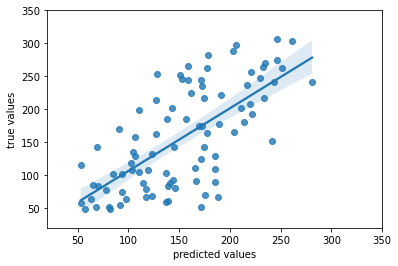

In [244]:
truepredplot(y_test, predict_ridge)

In [245]:
predict_ridge = rigde_reg_gridsearch.predict(X_train)

regression_score(y_train, predict_ridge)

RMSE: 53.25452921983398
MSE: 2836.044882426151
R2: 0.521638157532748
MAPE: 43.06800198681959


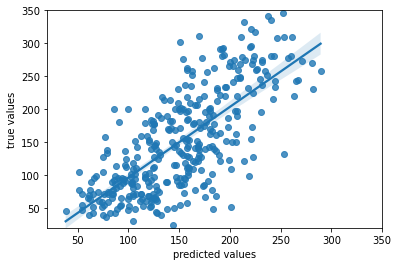

In [246]:
truepredplot(y_train, predict_ridge)

In [247]:
pd.DataFrame(rigde_reg_gridsearch.best_estimator_.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
ltg,502.262404
bmi,457.431775
bp,286.889819
glu,94.007303
age,7.665377
tc,-72.155592
hdl,-259.712228
sex,-261.319679


1. Гребнева регресія порівнянно з лінійною регресією зі значенням intercept=True має +- такіж самі значення похибок, хоч і трохи кращі
2. Перенавчання у моделі немає
3. Розподіл коефіцієнтів схожий на fit_intercept=True

<font size="5">Тепер спробуємо Lasso regression з різними параметрами alpha:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [248]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
parameters = {'alpha': [0.1, 1, 2, 5]}

lasso_reg_gridsearch = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=5)

In [249]:
lasso_reg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error')

In [250]:
gridsearchscore(lasso_reg_gridsearch)

Best score: -3023.485065442853, Best alpha: {'alpha': 0.1}


In [251]:
lasso_reg_gridsearch.cv_results_

{'mean_fit_time': array([0.        , 0.00160012, 0.00320034, 0.00160036]),
 'std_fit_time': array([0.        , 0.00320024, 0.0039196 , 0.00320072]),
 'mean_score_time': array([0.        , 0.00159969, 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.00319939, 0.        , 0.        ]),
 'param_alpha': masked_array(data=[0.1, 1, 2, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1}, {'alpha': 1}, {'alpha': 2}, {'alpha': 5}],
 'split0_test_score': array([-2633.15563312, -3289.6084752 , -5533.52870845, -5637.82261622]),
 'split1_test_score': array([-3756.61738651, -4666.14098599, -6489.07955244, -6782.04864419]),
 'split2_test_score': array([-2959.2265174 , -3420.96104158, -4871.61114224, -5176.76349987]),
 'split3_test_score': array([-2595.04305939, -3329.79833806, -4590.00041416, -4939.38631612]),
 'split4_test_score': array([-3173.3827308 , -4673.16667634, -7066.7857991 , -7133.37911591]),
 

In [252]:
predict_lasso = lasso_reg_gridsearch.predict(X_test)

regression_score(y_test, predict_lasso)

RMSE: 56.266730082860306
MSE: 3165.9449142174567
R2: 0.4638739197069017
MAPE: 45.89348799916483


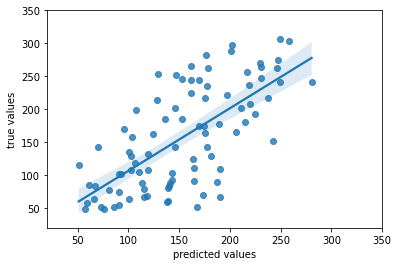

In [253]:
truepredplot(y_test, predict_lasso)

In [254]:
predict_lasso = lasso_reg_gridsearch.predict(X_train)

regression_score(y_train, predict_lasso)

RMSE: 53.35189145484188
MSE: 2846.42432180923
R2: 0.5198874349761926
MAPE: 43.19094621437006


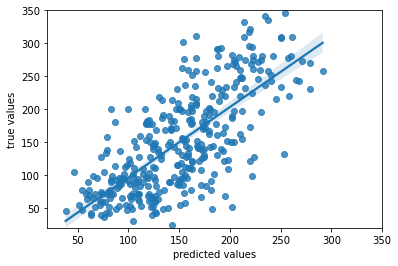

In [255]:
truepredplot(y_train, predict_lasso)

In [256]:
pd.DataFrame(lasso_reg_gridsearch.best_estimator_.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
ltg,531.668368
bmi,485.118670
bp,268.284607
glu,38.381922
age,0.000000
tc,-36.723960
hdl,-233.728423
sex,-235.112157


1. Значення близькі до лінійної і гребневої регресії 
2. Перенавчання немає
3. Розподіл коефіцієнтів схожий на попердні регрессії, але цікаво те, що коефіцієнт у віку дорівнює нулю, тобто зовсім не впливаю на результат

<font size="5">Тепер спробуємо Elastic regression з різними параметрами alpha, l1_ratio:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [257]:
from sklearn.linear_model import ElasticNet

EN_reg = ElasticNet()
parameters = {'alpha': [0.1, 1, 2, 5],
              'l1_ratio': [0, 0.2, 0.5, 0.8, 1]}

EN_reg_gridsearch = GridSearchCV(EN_reg, parameters, scoring='neg_mean_squared_error', cv=5)

In [258]:
EN_reg_gridsearch.fit(X_train, y_train)

c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 825539.6964281036, tolerance: 169.25366560283692
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782516.8962378335, tolerance: 161.14395921985817
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 840432.5000382238, tolerance: 172.54524113475176
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 2, 5],
                         'l1_ratio': [0, 0.2, 0.5, 0.8, 1]},
             scoring='neg_mean_squared_error')

In [259]:
gridsearchscore(EN_reg_gridsearch)

Best score: -3023.485065442853, Best alpha: {'alpha': 0.1, 'l1_ratio': 1}


In [260]:
EN_reg_gridsearch.cv_results_

{'mean_fit_time': array([0.00320029, 0.00160031, 0.00319996, 0.00320058, 0.00160041,
        0.0032001 , 0.00320048, 0.        , 0.00159998, 0.00159998,
        0.00396824, 0.00160046, 0.00160017, 0.00159984, 0.00159998,
        0.00640068, 0.00159988, 0.00160022, 0.        , 0.00160003]),
 'std_fit_time': array([0.00391954, 0.00320063, 0.00391913, 0.00391989, 0.00320082,
        0.00391931, 0.00391978, 0.        , 0.00319996, 0.00319996,
        0.00354269, 0.00196015, 0.00320034, 0.00319967, 0.00319996,
        0.00320034, 0.00319977, 0.00320044, 0.        , 0.00320005]),
 'mean_score_time': array([0.00160027, 0.00160041, 0.        , 0.        , 0.        ,
        0.00159998, 0.        , 0.00159993, 0.00160041, 0.00160036,
        0.00239911, 0.00160842, 0.00160031, 0.00160036, 0.00160046,
        0.        , 0.0016006 , 0.00160012, 0.00160022, 0.00160036]),
 'std_score_time': array([0.00320053, 0.00320082, 0.        , 0.        , 0.        ,
        0.00319996, 0.        , 0.003199

In [261]:
predict_EN = EN_reg_gridsearch.predict(X_test)

regression_score(y_test, predict_EN)

RMSE: 56.266730082860306
MSE: 3165.9449142174567
R2: 0.4638739197069017
MAPE: 45.89348799916483


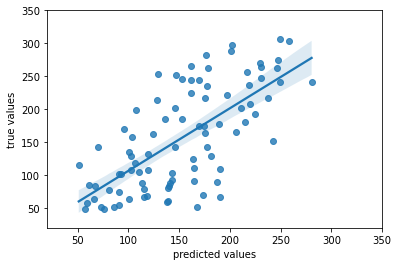

In [262]:
truepredplot(y_test, predict_EN)

In [263]:
predict_EN = EN_reg_gridsearch.predict(X_train)

regression_score(y_train, predict_EN)

RMSE: 53.35189145484188
MSE: 2846.42432180923
R2: 0.5198874349761926
MAPE: 43.19094621437006


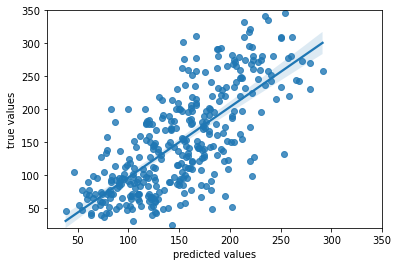

In [264]:
truepredplot(y_train, predict_EN)

In [265]:
pd.DataFrame(EN_reg_gridsearch.best_estimator_.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
ltg,531.668368
bmi,485.118670
bp,268.284607
glu,38.381922
age,0.000000
tc,-36.723960
hdl,-233.728423
sex,-235.112157


1. Найкращим гіперпараметром l1_ratio ми отримали 1, що дорівнює похибці l2_ratio, тобто регресії Лассо (саме вона використовує цей вид похибки) і тому результати похибок і залишків у нас однакове як і у Лассо
2. Перенавчання немає
3. Коефіцієнти схожі з попередніми, у віку як і у Лассо коефіцієнт дорівнює нулю

Найкраще всього себе показала гребнева регресія, хоч і різниця між ними була не дуже велика, це був очікуваний результат оскільки саме ця регресія показує себе найкраще з великою кількістю ознак, які не є незалежними одна від одної (тобто колінеарні)